# C3M3 Autograded Assignment

### Outline:
**Here are the objectives of this assignment:**

1. Apply nonparametric regression to actual data.
2. Visualize the differences between parametrics and nonparametric regressions.
3. Cemment our understanding of Kernels, Bandwidths, and Splines.
4. Understand the different kinds of nonparametric regression.

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. You will not recieve any feedback for failed hidden unit tests until the assignment is submitted. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.

In [1]:
# Load Required Libraries
library(testthat)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks tidyr::matches(), testthat::matches()



# Problem 1: Comparing Parametric and Nonparametric Regression

The exa dataset is a simulated dataset following the function $f(x)=\sin^3(2\pi x^3)$. The data is loaded and plotted below. We will use this dataset to get you practicing some non-parametric regression techniques.

Data Source: Haerdle, W. (1991). Smoothing Techniques with Implementation in S. New York:Springer.

,X,x,y,m
,<int>,<dbl>,<dbl>,<dbl>
1,1,0.0048,-0.0339,0
2,2,0.0086,0.1654,0
3,3,0.0117,0.0245,0
4,4,0.0170,0.1784,0
5,5,0.0261,-0.3466,0
6,6,0.0299,-0.7550,0


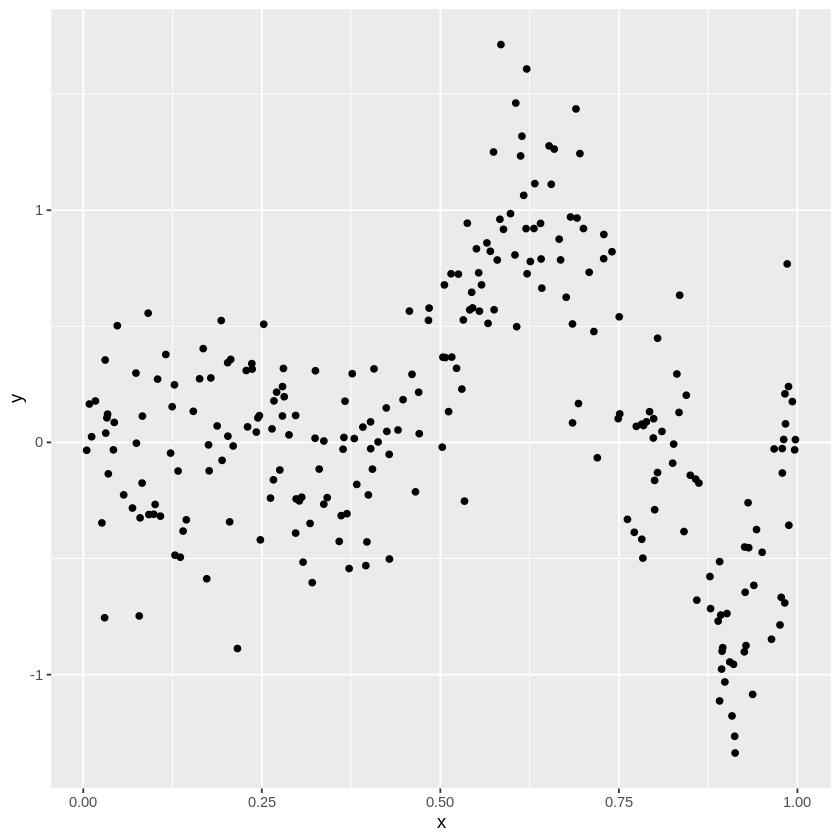

In [2]:
# Load in the Data
exa = read.csv("exa.csv")
head(exa)
# Plot the Data
g = ggplot(exa, aes(x=x, y=y)) +
        geom_point()
g

### 1. (a) Linear Regression First

From the graph, we can assume that a linear model isn't going to plot to this function very well. But assumptions can be wrong, so let's see how well they do for our model.

Begin by fitting a linear model with `y` as the response and `x` as the predictor. Save this model as `exa.lmod.1` and it's $R^2$ as `exa.lmod.1.r2`. Because there is only one predictor, we can visually plot our model to see how well it fits the data. Plot your model ontop of the original plot.

Now, lets add some parametric terms. Following the techniques displayed in the videos, add parametric terms of `x` of higher and higher degrees until you reach one that is no longer significant. Use the previous model with a significant $d^{th}$ predictor coefficient. Save this model as `exa.lmod.d` and its $R^2$ value as `exa.lmod.d.r2`. Then plot this model ontop of the origional plot as well.

[1] 0.005570868

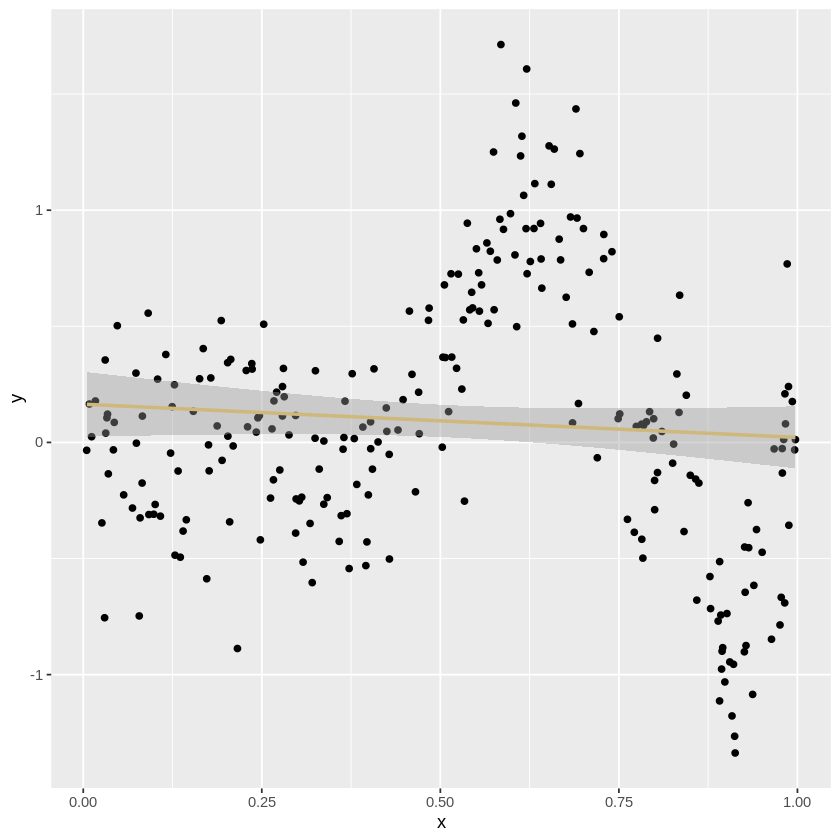

In [3]:
# Fit a linear model
exa.lmod.1 <- lm(y ~ x, data=exa)


exa.lmod.1.r2 <- summary(exa.lmod.1)$r.squared
exa.lmod.1.r2

# Add the linear model to the plot
g <- g + geom_smooth(method="lm", formula=y ~ x, color="#CFB87C")
g

[1] 0.6790734

Warning message:
“Computation failed in `stat_smooth()`:
object of type 'closure' is not subsettable”


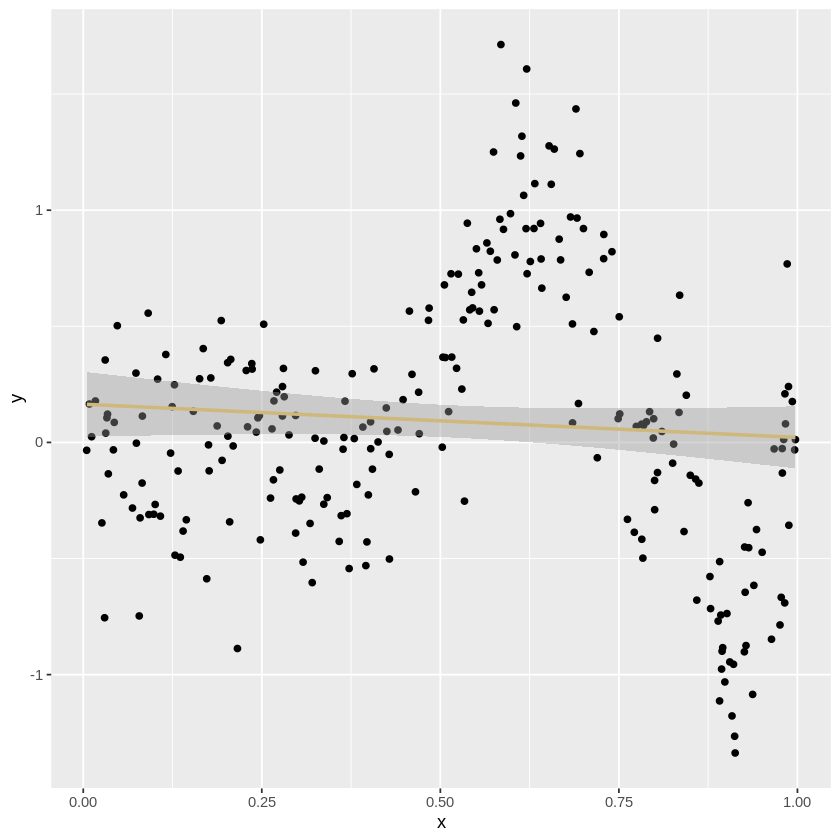

In [4]:
# Function to fit polynomial models and compare them
fit_poly_models <- function(data, max_degree) {
  models <- list()
  r2_values <- numeric(max_degree)
  
  for (d in 1:max_degree) {
    formula <- as.formula(paste("y ~ poly(x, ", d, ")", sep = ""))
    models[[d]] <- lm(formula, data = data)
    r2_values[d] <- summary(models[[d]])$r.squared
    
    if (d > 1) {
      anova_result <- anova(models[[d - 1]], models[[d]])
      if (anova_result[2, "Pr(>F)"] > 0.05) {
        break
      }
    }
  }
  
  list(model = models[[d - 1]], r2 = r2_values[d - 1])
}

# Fit polynomial models up to degree 10
result <- fit_poly_models(exa, 10)
exa.lmod.d <- result$model
exa.lmod.d.r2 <- result$r2
exa.lmod.d.r2

# Add the polynomial model to the plot
g <- g + geom_smooth(method="lm", formula=exa.lmod.d$call[[2]], color="#565A5C")
g


# plot(x=exa$x, y=exa$y, main="EXA with models overlaid")
# lines(exa.lmod.1, col="#CFB87C", lwd=2)
# lines(exa.lmod.d, col="#565A5C", lwd=2)


In [5]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [6]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 1. (b) Visualize some Smooth Functions

Even if `exa.lmod.d` looks pretty good, we know that it's not the original function. Let's try some smoothing functions to see how those preform.

Use the ksmooth() function to plot some kernel estimators of the unknown function $Y=f(x)$. Explore different possibilities for kernel functions, including `normal` and `uniform` kernels. For each kernel, try different bandwidths including $0.01$, $0.1$ and $1$. Plot your models and determine which combination provides the best results. Save your selected kernel as `best.kernel` and the best bandwidth as `best.bandwidth`.


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




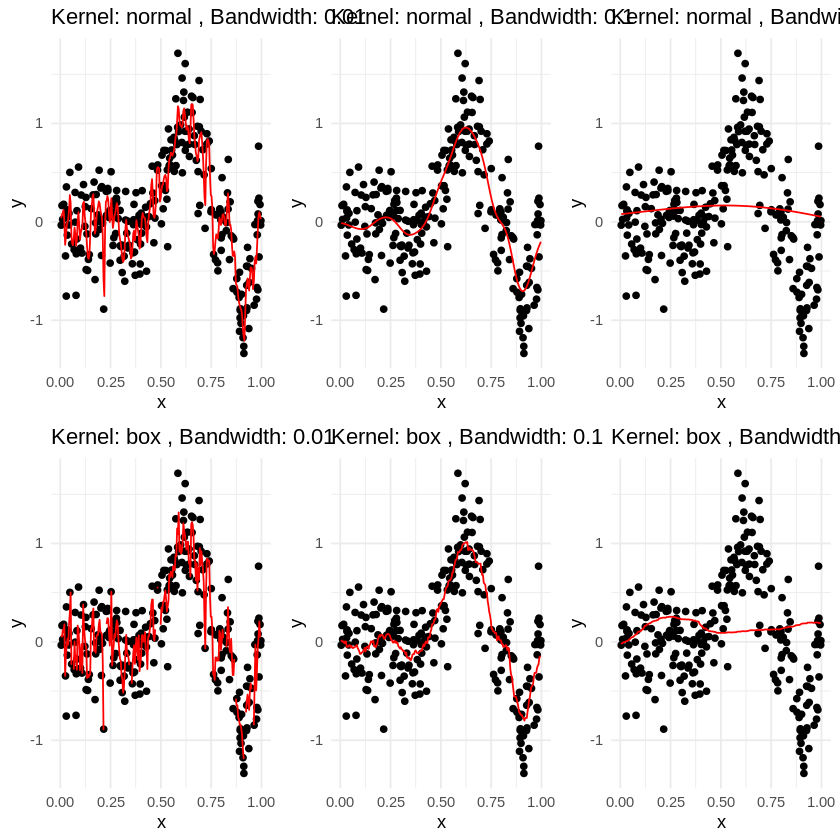

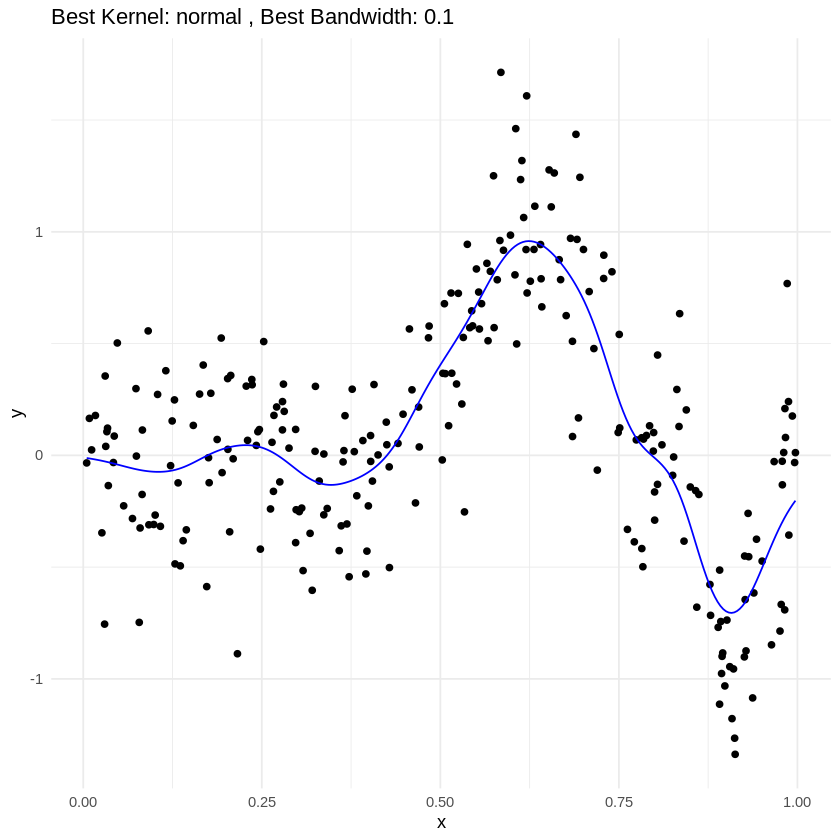

In [7]:
# Load necessary library
library(ggplot2)

# Function to perform kernel smoothing and plot results
plot_ksmooth <- function(data, kernel, bandwidth) {
  smoothed <- ksmooth(data$x, data$y, kernel = kernel, bandwidth = bandwidth)
  smoothed_df <- data.frame(x = smoothed$x, y = smoothed$y)
  
  ggplot(data, aes(x = x, y = y)) +
    geom_point() +
    geom_line(data = smoothed_df, aes(x = x, y = y), color = "red") +
    ggtitle(paste("Kernel:", kernel, ", Bandwidth:", bandwidth)) +
    theme_minimal()
}

# Define kernels and bandwidths to explore
kernels <- c("normal", "box")
bandwidths <- c(0.01, 0.1, 1)

# Plot kernel smoothing for all combinations
plots <- list()
for (kernel in kernels) {
  for (bandwidth in bandwidths) {
    plots[[paste(kernel, bandwidth, sep = "_")]] <- plot_ksmooth(exa, kernel, bandwidth)
  }
}

# Display all plots
library(gridExtra)
do.call(grid.arrange, c(plots, ncol = 3))

# Based on visual inspection, determine the best kernel and bandwidth
best.kernel <- "normal"  # Replace with the best kernel after visual inspection
best.bandwidth <- 0.1    # Replace with the best bandwidth after visual inspection

# Plot the selected best kernel smoothing
best_smoothed <- ksmooth(exa$x, exa$y, kernel = best.kernel, bandwidth = best.bandwidth)
best_smoothed_df <- data.frame(x = best_smoothed$x, y = best_smoothed$y)

ggplot(exa, aes(x = x, y = y)) +
  geom_point() +
  geom_line(data = best_smoothed_df, aes(x = x, y = y), color = "blue") +
  ggtitle(paste("Best Kernel:", best.kernel, ", Best Bandwidth:", best.bandwidth)) +
  theme_minimal()



In [8]:
# Test Cell
if (!test_that("Checking Answer types", {expect_is(best.kernel, "character")
                                         expect_is(best.bandwidth, "numeric")})){
    print("Answers are incorrect types. Make sure best.bandwidth is numeric and best.kernel is a string.")
}
# This cell has hidden test cases that will run after submission.

In reality, manually finding this kernel value ourselves, especially if there are multiple predictors, can be challenging. There are some automated ways to do this, but none are perfect. 

### 1. (c) Smoothing Splines

Use the `smooth.spline()` function to fit a non-parametric model to your data, with `y` as the response and `x` as the predictor. Save your model as `exa.smooth`. Plot this model onto the origional scatterplot.

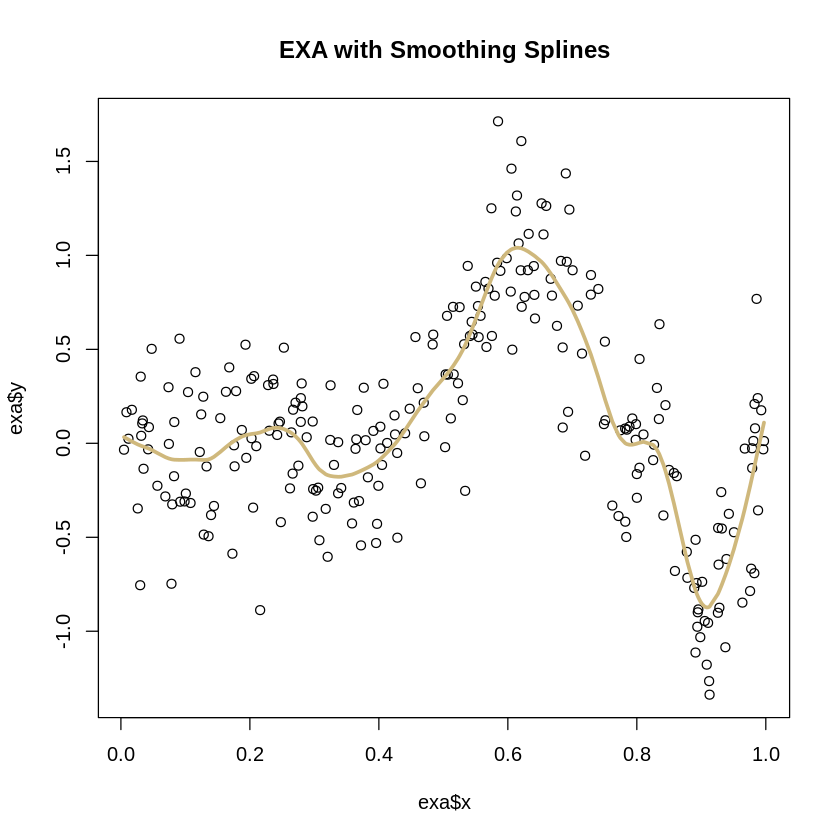

In [9]:
# Fit a smoothing spline model
exa.smooth <- smooth.spline(exa$x, exa$y)

# Plot the data with the smoothing spline model
plot(exa$x, exa$y, main = "EXA with Smoothing Splines")
lines(exa.smooth, col = "#CFB87C", lwd = 3)


In [10]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 1. (d) Goodness of Fit

How do we determine how well our model fits the data? We don't have an analytical method, so we need to use evaluation metrics.

Calculate the MSE for your three models. Store the values in `MSE.1`, `MSE.d` and `MSE.smooth` respectively. Which model performed the best?

In [11]:
# Calculate MSE for the linear model
pred.lmod.1 <- predict(exa.lmod.1, newdata = exa)
MSE.1 <- mean((exa$y - pred.lmod.1)^2)

# Calculate MSE for the polynomial model
pred.lmod.d <- predict(exa.lmod.d, newdata = exa)
MSE.d <- mean((exa$y - pred.lmod.d)^2)

# Calculate MSE for the smoothing spline model
pred.smooth <- predict(exa.smooth, exa$x)$y
MSE.smooth <- mean((exa$y - pred.smooth)^2)

# Print MSE values
MSE.1
MSE.d
MSE.smooth

# Determine the best performing model
best_model <- ifelse(MSE.1 < MSE.d & MSE.1 < MSE.smooth, "Linear Model",
                     ifelse(MSE.d < MSE.1 & MSE.d < MSE.smooth, "Polynomial Model",
                            "Smoothing Spline"))
best_model



[1] 0.3172591

[1] 0.1023873

[1] 0.08732266

[1] "Smoothing Spline"

In [12]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [13]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [14]:
# Test Cell
# This cell has hidden test cases that will run after submission.

# Problem 2 - General Nonparametric Questions

For each of the following questions, save your answer in the corresponding variable. Answer each as a boolean TRUE/FALSE value.

1. Generally, the choice of Kernel is more important than the choice of bandwidth.
2. A Kernel is defined to be symmetric for all values of $x$ and $\int K(x)dx = 1$.
3. Smoothing Splines are a balance between fitting the training data as accurately as possible and penalizing models that have a greater amount of curvature.
4. For Loess estimation, if $p=0$, then the Loesse estimator is equivalent to Kernel estimation.
5. The `smooth.spline()` function is guaranteed to give you the best bandwidth value.

In [15]:
prob.2.1 <- FALSE
prob.2.2 <- TRUE
prob.2.3 <- TRUE
prob.2.4 <- TRUE
prob.2.5 <- FALSE


In [16]:
# Test Cell
if (!test_that("Checking answer types", expect_is(c(prob.2.1, prob.2.2, prob.2.3, prob.2.4, prob.2.5), 
                                                  c("logical", "logical", "logical", "logical", "logical")))){
    print("Make sure your answers are all booleans!")
}
# This cell has hidden test cases that will run after submission.

In [17]:
# This cell has hidden test cases that will run after submission.

In [18]:
# This cell has hidden test cases that will run after submission.

In [19]:
# This cell has hidden test cases that will run after submission.

In [20]:
# This cell has hidden test cases that will run after submission.